<a href="https://colab.research.google.com/github/ngzhiwei517/Machine_Learning_Self-Learn/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

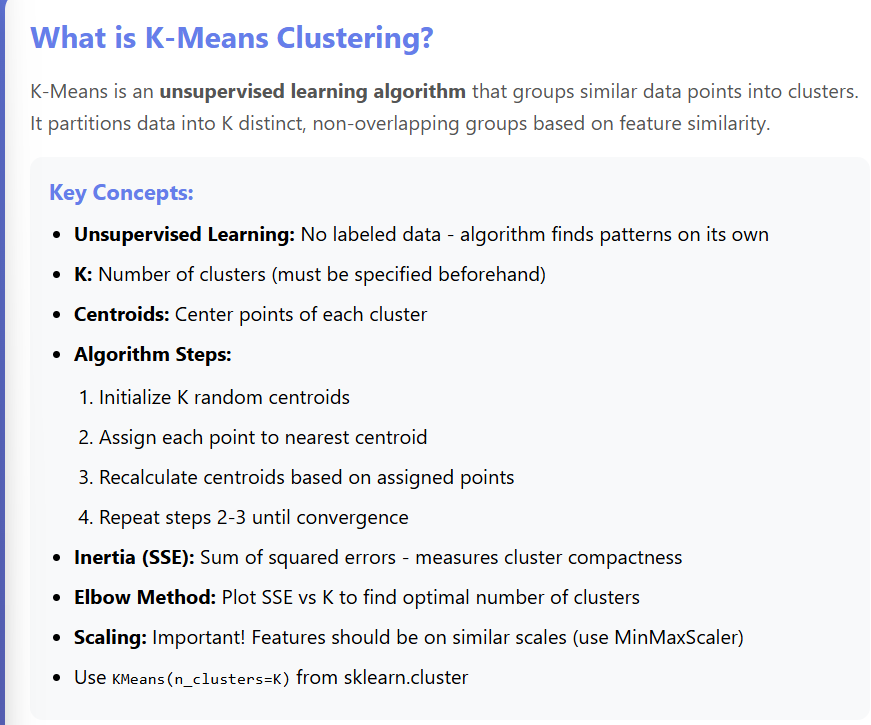

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [58]:

df = pd.read_csv("income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


Text(0, 0.5, 'Income($)')

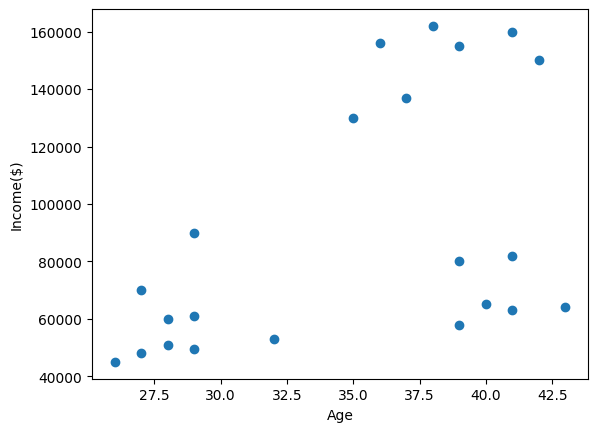

In [55]:
plt.scatter(df['Age'],df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

Obviously we can use three clusters at first

In [61]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [63]:
df['cluster']=y_predicted
df
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]

In [64]:
df0

,Name,Age,Income($),cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


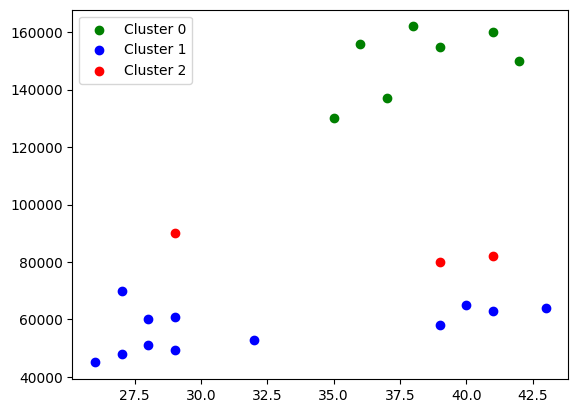

In [66]:
plt.scatter(df0['Age'],df0['Income($)'],color='g',label='Cluster 0')
plt.scatter(df1['Age'],df1['Income($)'],color='b',label='Cluster 1')
plt.scatter(df2['Age'],df2['Income($)'],color='r',label='Cluster 2')
plt.legend()

We notice the graph is not perfect with some error in classification. Hence, we perform min-max scaler

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['Age']]) #learn the max and min value of age
df['Age']=scaler.transform(df[['Age']]) #undergo transformation

scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [74]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [75]:
df['cluster']=y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [76]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
df0

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,0
17,Priyanka,0.882353,0.153846,0
18,Nick,1.000000,0.162393,0
19,Alia,0.764706,0.299145,0
20,Sid,0.882353,0.316239,0
21,Abdul,0.764706,0.111111,0


In [78]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

2️⃣ [:, 0] → X-axis values

 “Take ALL rows, column 0”

 This becomes: x-coordinates of centroids


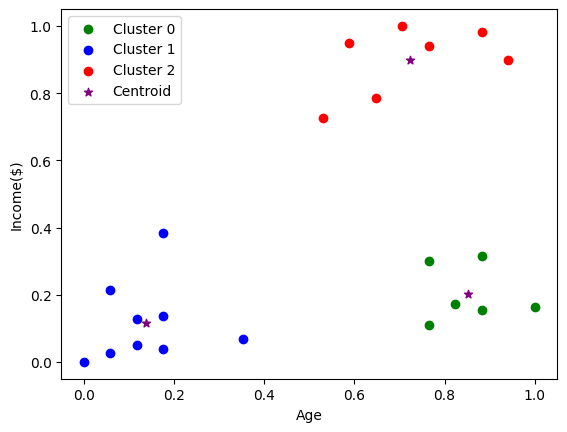

In [79]:
plt.scatter(df0['Age'],df0['Income($)'],color='g',label='Cluster 0')
plt.scatter(df1['Age'],df1['Income($)'],color='b',label='Cluster 1')
plt.scatter(df2['Age'],df2['Income($)'],color='r',label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='Centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# Elbow Plot

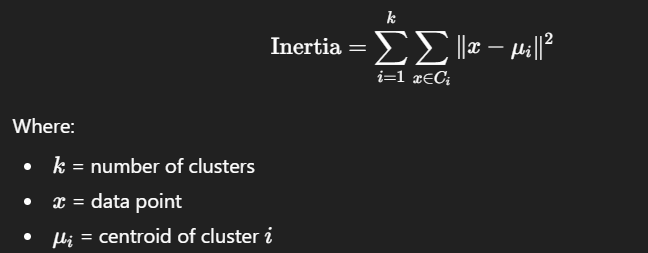

In [85]:
ssm=[]
k_range=range(1,10)
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['Age','Income($)']])
  ssm.append(km.inertia_)
ssm

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3687734076440591,
 0.2829404587160481,
 0.22020960864009395,
 0.1999500328249627,
 0.16259520162974453,
 0.1224957582608486]

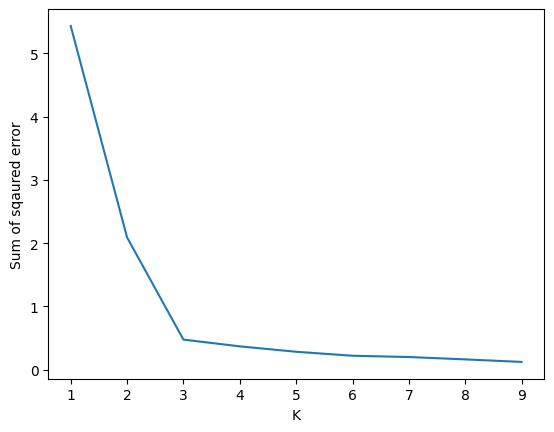

In [86]:
plt.xlabel('K')
plt.ylabel('Sum of sqaured error')
plt.plot(k_range,ssm)

Obviously elbow is K=3



---



---



---
# Exercise


Simple clustering: Group data points by X=[1, 2, 8, 9, 10] and Y=[1, 2, 8, 9, 10]. Use K=2 clusters and visualize with scatter plot.

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.array([[1,1], [2,2], [8,8], [9,9], [10,10]])
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(X)
y_predicted

array([0, 0, 1, 1, 1], dtype=int32)

In [111]:
df=pd.DataFrame(X)
df['Cluster']=y_predicted
df

,0,1,Cluster
0,1,1,0
1,2,2,0
2,8,8,1
3,9,9,1
4,10,10,1


In [113]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df0

,0,1,Cluster
0,1,1,0
1,2,2,0


In [114]:
km.cluster_centers_

array([[1.5, 1.5],
       [9. , 9. ]])

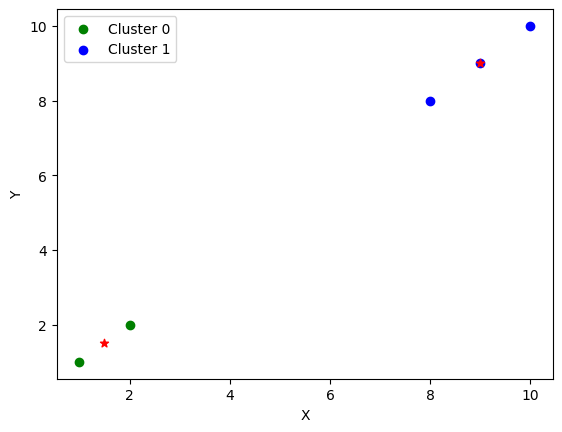

In [115]:
plt.scatter(df0[0],df0[1],label='Cluster 0',color='g')
plt.scatter(df1[0],df1[1],label='Cluster 1',color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='r',marker='*')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

Customer segmentation: Age [25, 30, 45, 50, 60] and Income [35000, 50000, 60000, 80000, 100000]. Cluster into 2 groups. Important: Scale the data first using MinMaxScaler!

In [97]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame({
    'Age': [25, 30, 45, 50, 60],
    'Income': [35000, 50000, 60000, 80000, 100000]
})
df

,Age,Income
0,25,35000
1,30,50000
2,45,60000
3,50,80000
4,60,100000


In [99]:
scaler=MinMaxScaler()
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])

df

,Age,Income
0,0.000000,0.000000
1,0.142857,0.230769
2,0.571429,0.384615
3,0.714286,0.692308
4,1.000000,1.000000


In [100]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 0, 0, 0], dtype=int32)

In [101]:
df['cluster']=y_predicted
df

,Age,Income,cluster
0,0.000000,0.000000,1
1,0.142857,0.230769,1
2,0.571429,0.384615,0
3,0.714286,0.692308,0
4,1.000000,1.000000,0


In [102]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df0

,Age,Income,cluster
2,0.571429,0.384615,0
3,0.714286,0.692308,0
4,1.000000,1.000000,0


In [105]:
km.cluster_centers_

array([[0.76190476, 0.69230769],
       [0.07142857, 0.11538462]])

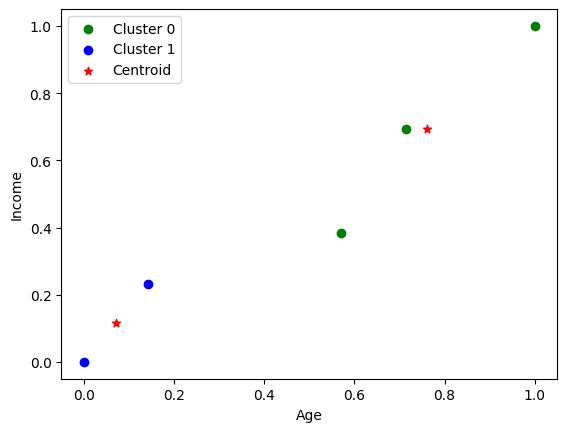

In [109]:
plt.scatter(df0['Age'],df0['Income'],label='Cluster 0',color='g')
plt.scatter(df1['Age'],df1['Income'],label='Cluster 1',color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='r',marker='*',label='Centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

Elbow method: Using the iris dataset (only petal features), create an elbow plot for K=1 to 9. Find the optimal K by identifying the "elbow" point where SSE drops level off.

In [125]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [128]:
X = iris.data[:, 2:]
# It goes through all rows
# It starts from the 3rd column, not the 2nd

In [138]:
k_range=range(1,10)
sse=[]
for i in k_range:
  km=KMeans(n_clusters=i)
  km.fit(X) #Trains the KMeans model
  sse.append(km.inertia_)

sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.529733592880984,
 14.130893864755931,
 11.508683908045974,
 10.407500696184904,
 9.126146041458538,
 6.965873410902821]

Text(0, 0.5, 'SSM')

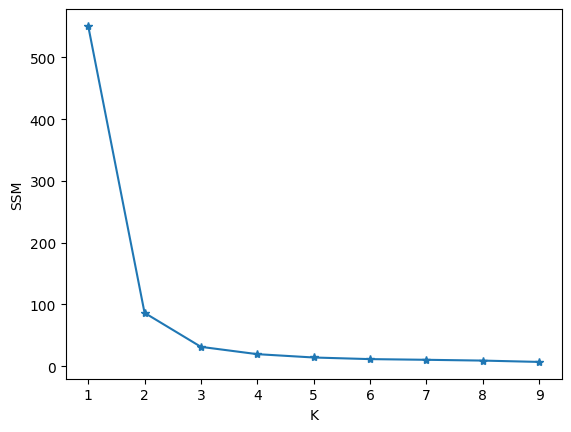

In [142]:
plt.plot(k_range,sse,'*-')
plt.xlabel('K')
plt.ylabel('SSM')

Visually, the sharpest bend is indeed around K = 2.

Complete pipeline: Load iris dataset, use only petal features, scale with MinMaxScaler, apply K-Means with K=3, visualize clusters with different colors, and show centroids as stars.

In [147]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
iris=load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [150]:
X=df.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [153]:
scaler=MinMaxScaler()
scaler.fit(X[['petal length (cm)']])
X['petal length (cm)']=scaler.transform(X[['petal length (cm)']])

scaler.fit(X[['petal width (cm)']])
X['petal width (cm)']=scaler.transform(X[['petal width (cm)']])

X

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [159]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(X[['petal length (cm)','petal width (cm)']])
y_predicted
X['Cluster']=y_predicted
X

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [160]:
X0=X[X.Cluster==0]
X1=X[X.Cluster==1]
X2=X[X.Cluster==2]
X0

,petal length (cm),petal width (cm),Cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
5,0.118644,0.125000,0
6,0.067797,0.083333,0
7,0.084746,0.041667,0
8,0.067797,0.041667,0
9,0.084746,0.000000,0


In [161]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.55867014, 0.51041667],
       [0.7740113 , 0.81510417]])

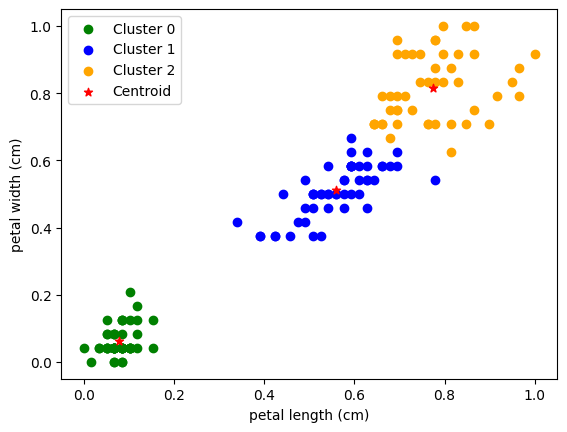

In [164]:
plt.scatter(X0['petal length (cm)'],X0['petal width (cm)'],label='Cluster 0',color='g')
plt.scatter(X1['petal length (cm)'],X1['petal width (cm)'],label='Cluster 1',color='b')
plt.scatter(X2['petal length (cm)'],X2['petal width (cm)'],label='Cluster 2',color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='r',marker='*',label='Centroid')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()



---



---

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.

2. Figure out if any preprocessing such as scaling would help here

3. Draw elbow plot and from that figure out optimal value of k

In [186]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [187]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df=df.drop('sepal length (cm)',axis=1)
df=df.drop('sepal width (cm)',axis=1)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


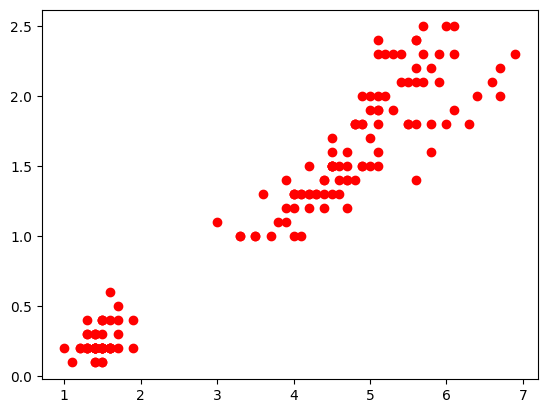

In [188]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],color='r')


I decided to try k=2 first

In [189]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(df[['petal length (cm)','petal width (cm)']])
y_predicted
df['Cluster']=y_predicted
df

,petal length (cm),petal width (cm),Cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [190]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df0

,petal length (cm),petal width (cm),Cluster
50,4.7,1.4,0
51,4.5,1.5,0
52,4.9,1.5,0
53,4.0,1.3,0
54,4.6,1.5,0
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [191]:
km.cluster_centers_

array([[4.92525253, 1.68181818],
       [1.49215686, 0.2627451 ]])

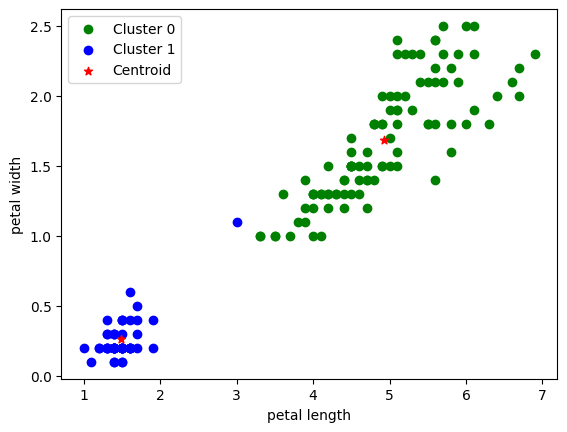

In [192]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],label='Cluster 0',color='g')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],label='Cluster 1',color='b')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='r',marker='*',label='Centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

In [178]:
sse=[]
k_range=range(1,10)
for i in k_range:
  km=KMeans(n_clusters=i)
  km.fit(df[['petal length (cm)','petal width (cm)']])
  sse.append(km.inertia_)
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.529733592880984,
 14.701112010796223,
 13.139603845698877,
 9.321390756302524,
 8.465694740042563,
 6.796904621380323]

Text(0, 0.5, 'SSE')

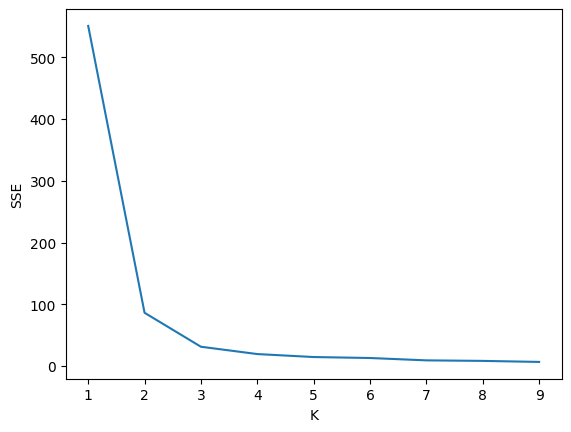

In [179]:
plt.plot(k_range,sse)
plt.xlabel('K')
plt.ylabel('SSE')